In [1]:
# Import dependencies 
import pandas as pd
from splinter import Browser
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

# Set up Browser with Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|█████████████████| 8.41M/8.41M [00:08<00:00, 1.09MB/s]


In [2]:
# Visit the Mars NASA news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)
# Set up the HTML parser
html = browser.html
news_soup = soup(html, 'html.parser')

In [3]:
# Quit browser 
browser.quit()
# Read table from the website as a Pandas DataFrame
pd_mars = pd.read_html(url)[0]
pd_mars_df = pd.DataFrame(pd_mars)
print(pd_mars)

        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


In [4]:
# Examine the data types of all the DataFrame columns
pd_mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [5]:
# Convert the data to the appropriate datetime, int, or float data types
pd_mars_df['terrestrial_date'] = pd.to_datetime(pd_mars_df['terrestrial_date'])
pd_mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [6]:
# How many months exist on Mars?
last_month = pd_mars_df['month'].max()
print(f'There are', last_month ,'months on Mars.')

There are 12 months on Mars.


In [7]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
row_count = len(pd_mars_df)
print(f'There are', row_count, 'Martian days worth of data in the dataset')

There are 1867 Martian days worth of data in the dataset


The coldest month on Mars at the location of Curiosity is the 3  month and the warmest month is the 8 month


Text(0.5, 1.0, 'Average Minimum Temperature by Month')

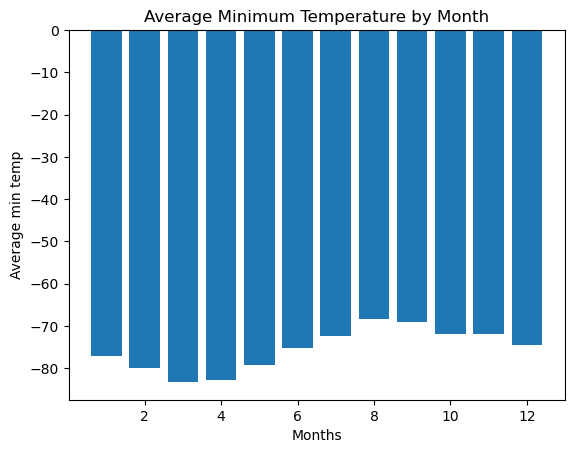

In [8]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)?
# Get the answer by averaging the minimum daily temperature of all the months.
pd_mars_df_min_month_taemperature = pd_mars_df.groupby(pd_mars_df['month'])['min_temp'].mean().sort_index().reset_index()
# The coldest month 
coldest_month_mean_temp = pd_mars_df_min_month_taemperature['min_temp'].min()
coldest_month =  pd_mars_df_min_month_taemperature.loc[pd_mars_df_min_month_taemperature['min_temp'] == coldest_month_mean_temp, 'month'].item()
# The warmest month 
warmest_month_mean_temp = pd_mars_df_min_month_taemperature['min_temp'].max()
warmest_month =  pd_mars_df_min_month_taemperature.loc[pd_mars_df_min_month_taemperature['min_temp'] == warmest_month_mean_temp, 'month'].item()
# Answer to the question
print(f'The coldest month on Mars at the location of Curiosity is the', coldest_month, ' month and the warmest month is the', warmest_month, 'month')
# Plot the results as a bar chart.
plt.bar(pd_mars_df_min_month_taemperature['month'],pd_mars_df_min_month_taemperature['min_temp'])
# Labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Average min temp")
# Create title 
plt.title('Average Minimum Temperature by Month')

The month with the lowest atmospheric pressure on Mars at the location of Curiosity is the 6  month and the month with the highest atmospheric pressure is the 9 month


Text(0.5, 1.0, 'Average Atmospheric Pressure by Month')

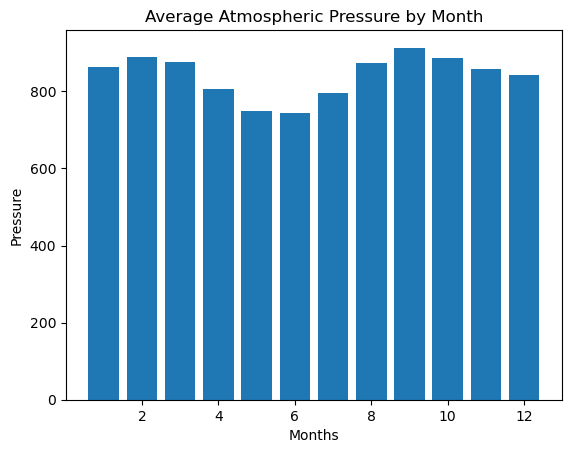

In [9]:
# Which months have the lowest and the highest atmospheric pressure on Mars?
# Get the answer by averaging the daily atmospheric pressure of all the months.
pd_mars_df_atms_press = pd_mars_df.groupby(pd_mars_df['month'])['pressure'].mean().sort_index().reset_index()
# The month with the lowest atmospheric pressure
lowest_mean_atm_press_month = pd_mars_df_atms_press['pressure'].min()
lowest_atm_press_month =  pd_mars_df_atms_press.loc[pd_mars_df_atms_press['pressure'] == lowest_mean_atm_press_month, 'month'].item()
# The month with the highest atmospheric pressure
highest_mean_atm_press_month = pd_mars_df_atms_press['pressure'].max()
highest_atm_press_month =  pd_mars_df_atms_press.loc[pd_mars_df_atms_press['pressure'] == highest_mean_atm_press_month, 'month'].item()
# Answer to the question
print(f'The month with the lowest atmospheric pressure on Mars at the location of Curiosity is the', lowest_atm_press_month, ' month and the month with the highest atmospheric pressure is the', highest_atm_press_month, 'month')
# Plot the results as a bar chart.
plt.bar(pd_mars_df_atms_press['month'],pd_mars_df_atms_press['pressure'])
# Labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Pressure")
# Create title 
plt.title('Average Atmospheric Pressure by Month')

In a Martian year exist 687 days 00:00:00 terrestrial days
Visually in a Martian year exist 666.6666666666666 terrestrial days


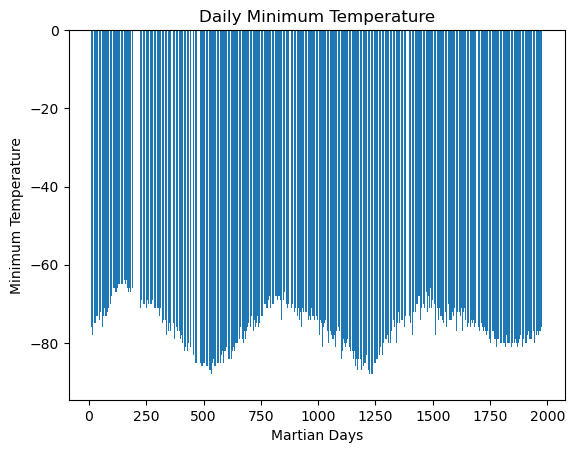

In [10]:
# About how many terrestrial (Earth) days exist in a Martian year?
# That is, in the time that Mars circles the Sun once, how many days elapse on Earth?
# Idex of the solar longitud 0, start and end of the Martian year
index_list_long_0 = pd_mars_df.ls[pd_mars_df.ls == 0].index.tolist()
index_begining_year = index_list_long_0[0]
index_end_year = index_list_long_0[2]
# Terrestrial date where the Martian year started and ended
terrestrial_date_start_martian_year = pd_mars_df.iloc[index_begining_year]['terrestrial_date']
terrestrial_date_end_martian_year = pd_mars_df.iloc[index_end_year]['terrestrial_date']
# Number of days that exist in a Martian year
terrestrial_days_martian_year = terrestrial_date_end_martian_year - terrestrial_date_start_martian_year
print(f'In a Martian year exist', terrestrial_days_martian_year, 'terrestrial days')
# Visually estimate the result by plotting the daily minimum temperature.
# Ploting the daily minimum temperature and Martian Days
plt.bar(pd_mars_df['sol'],pd_mars_df['min_temp'])
# Labels for the x and y axes.
plt.xlabel("Martian Days")
plt.ylabel("Minimum Temperature")
# Create title 
plt.title('Daily Minimum Temperature')
# Visually there are 3 years on aprox. 2000 days based on the behavior of the temperature at Mars.
number_of_days_martian_year = 2000/3
print(f'Visually in a Martian year exist', number_of_days_martian_year, 'terrestrial days')

In [11]:
# Export the DataFrame to a CSV file.
pd_mars_df.to_csv('mars_df.csv',index=False)